# **Time Series Analysis**

## **EDA**

In [1]:
import calendar
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('formatted_data.csv')
df.head()

,date,unique_id,car_id,company,body_style,model,color,transmission,engine,customer_name,gender,annual_income,income_level,dealer_name,dealer_no,dealer_region,price
0,2022-01-02,C_CND_000001,FORD_SUV_EXPEDITION_A,Ford,SUV,Expedition,Black,Auto,DoubleÂ Overhead Camshaft,Geraldine,Male,13500,Low,Buddy Storbeck's Diesel Service Inc,06457-3834,Middletown,26000
1,2022-01-02,C_CND_000021,TOYOTA_SED_4RUNNER_M,Toyota,Sedan,4Runner,Black,Manual,Overhead Camshaft,Adrianna,Male,13500,Low,Clay Johnson Auto Sales,78758-7841,Austin,25000
2,2022-01-02,C_CND_000022,INFINITI_HAR_I30_A,Infiniti,Hardtop,I30,Black,Auto,DoubleÂ Overhead Camshaft,Joshua,Male,2500000,Very High,Classic Chevy,85257-3102,Austin,21000
3,2022-01-02,C_CND_000024,PORSCHE_PAS_CARRERA CABRIO_A,Porsche,Passenger,Carrera Cabrio,Pale White,Auto,DoubleÂ Overhead Camshaft,Arthur,Male,920000,High,Star Enterprises Inc,99301-3882,Pasco,18000
4,2022-01-02,C_CND_000025,VOLKSWAGEN_PAS_JETTA_A,Volkswagen,Passenger,Jetta,Pale White,Auto,DoubleÂ Overhead Camshaft,Lizzie,Male,672000,Medium,Suburban Ford,53546-9427,Janesville,22000


In [3]:
df.date = pd.to_datetime(df.date)
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month_name()
df['day'] = df.date.dt.day_name()
df.sort_values('date', inplace= True)

In [4]:
df_grouped = df.groupby(['year', 'month']).price.agg(['count', 'sum']).reset_index()
df_grouped['month'] = pd.Categorical(df_grouped['month'], categories= list(calendar.month_name)[1:], ordered=True)
df_grouped.sort_values(['year', 'month'], inplace= True)
df_grouped.month = df_grouped.month.apply(lambda x: x[:3])

fig = px.line(
    data_frame=df_grouped,
    x='month',
    y='sum',
    color='year',
    markers= True,
    hover_data={'year': False, 'month': False, 'sum': ':.2f', 'count': True},
    labels={'sum': 'Total Sales', 'count': 'Units Sold'},
    title='Total Price Over Time'
)

fig.update_layout(
    title='Total Sales Over Time',
    xaxis_title='Month',
    yaxis_title='Total Sales',
    legend_title='Year',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

fig.update_traces(hovertemplate='<b>Total Sales</b>: $%{y}<br>'+'<b>Cars Sold</b>: %{customdata[1]}')


In [5]:
df_grouped = df.groupby(['year', 'day']).price.agg(['count', 'sum']).reset_index()
df_grouped['day'] = pd.Categorical(df_grouped['day'], categories= list(calendar.day_name), ordered=True)
df_grouped.sort_values(['year', 'day'], inplace= True)
df_grouped.day = df_grouped.day.apply(lambda x: x[:3])

fig = px.line(
    data_frame=df_grouped,
    x='day',
    y='sum',
    color='year',
    markers= True,
    hover_data={'year': False, 'day': False, 'sum': ':.2f', 'count': True},
    labels={'sum': 'Total Sales', 'count': 'Units Sold'},
    title='Total Price Over Time'
)

fig.update_layout(
    title='Total Sales Over Time',
    xaxis_title='Day',
    yaxis_title='Total Sales',
    legend_title='Year',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

fig.update_traces(hovertemplate='<b>Total Sales</b>: $%{y}<br>'+'<b>Cars Sold</b>: %{customdata[1]}')


In [6]:


df_grouped = df.groupby(['dealer_region', 'year', 'day']).price.agg(['count', 'sum']).reset_index()
df_grouped['day'] = pd.Categorical(df_grouped['day'], categories= list(calendar.day_name), ordered=True)
df_grouped.sort_values(['year', 'day'], inplace= True)
df_grouped.day = df_grouped.day.apply(lambda x: x[:3])

fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Sales Over Time (2022)', 'Total Sales Over Time (2023)'))

for col, year in enumerate([2022, 2023], start= 1):
    for trace in px.line(
            data_frame=df_grouped[df_grouped.year == year],
            x='day',
            y='sum',
            color='dealer_region',
            markers= True,
            hover_data={'year': False, 'day': False, 'sum': ':.2f', 'count': True},
            labels={'sum': 'Total Sales', 'count': 'Units Sold'},
            title='Total Price Over Time'
        ).update_traces(hovertemplate='<b>Total Sales</b>: $%{y}<br>'+'<b>Cars Sold</b>: %{customdata[1]}').data:

        fig.add_trace(trace, row=1, col=col)


fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    ),
    xaxis=dict(title='Day'),
    yaxis=dict(title='Total Sales'),
    legend=dict(title='Dealer Region'),
    title_text="Total Sales Over Time"
)

- We can conclude that for both years, most cars were sold on Tuesday and Saturday in every region.
- One biggest diffence in data for 2022 and 2023 is that, in 2022 least sales were on Friday but in 2023 it was for Thursday.

## **Sales Forecasting**

In [7]:
df_time = df.groupby('date').size().reset_index(name='sales')

In [8]:
df_time.set_index('date',inplace=True)
df_time

,sales
date,
2022-01-02,35
2022-01-03,20
2022-01-04,15
2022-01-05,30
2022-01-06,10
...,...
2023-12-26,70
2023-12-27,35
2023-12-29,151


<AxesSubplot: xlabel='date'>

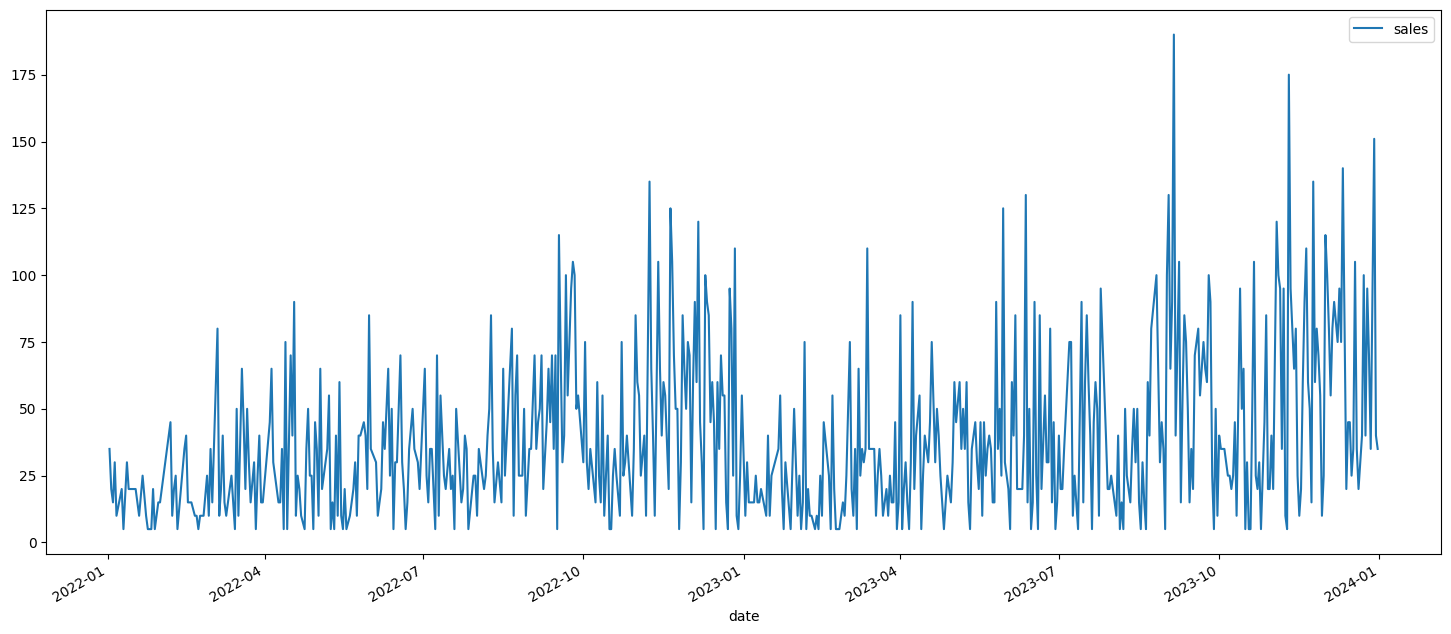

In [9]:
df_time.plot(figsize=(18,8))

We want to predict Monthly sales so we will transform our data.

<AxesSubplot: xlabel='date'>

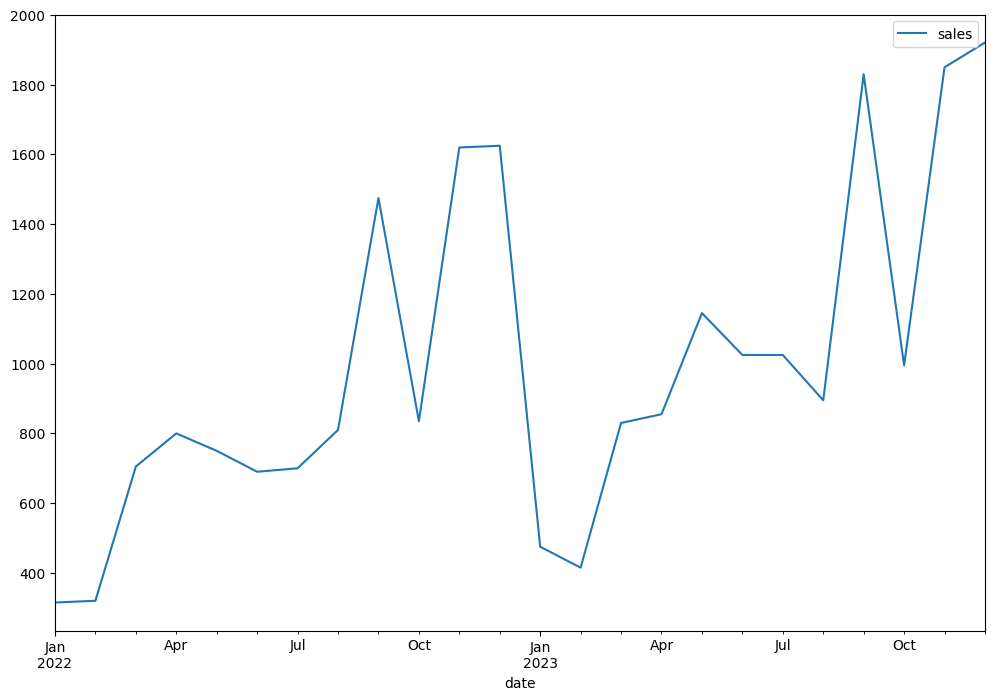

In [10]:
df_monthly = df_time.resample('M').sum()
df_monthly.plot(figsize=(12,8))

### **Plotting Exponential Weighted Moving Average (EWMA)**

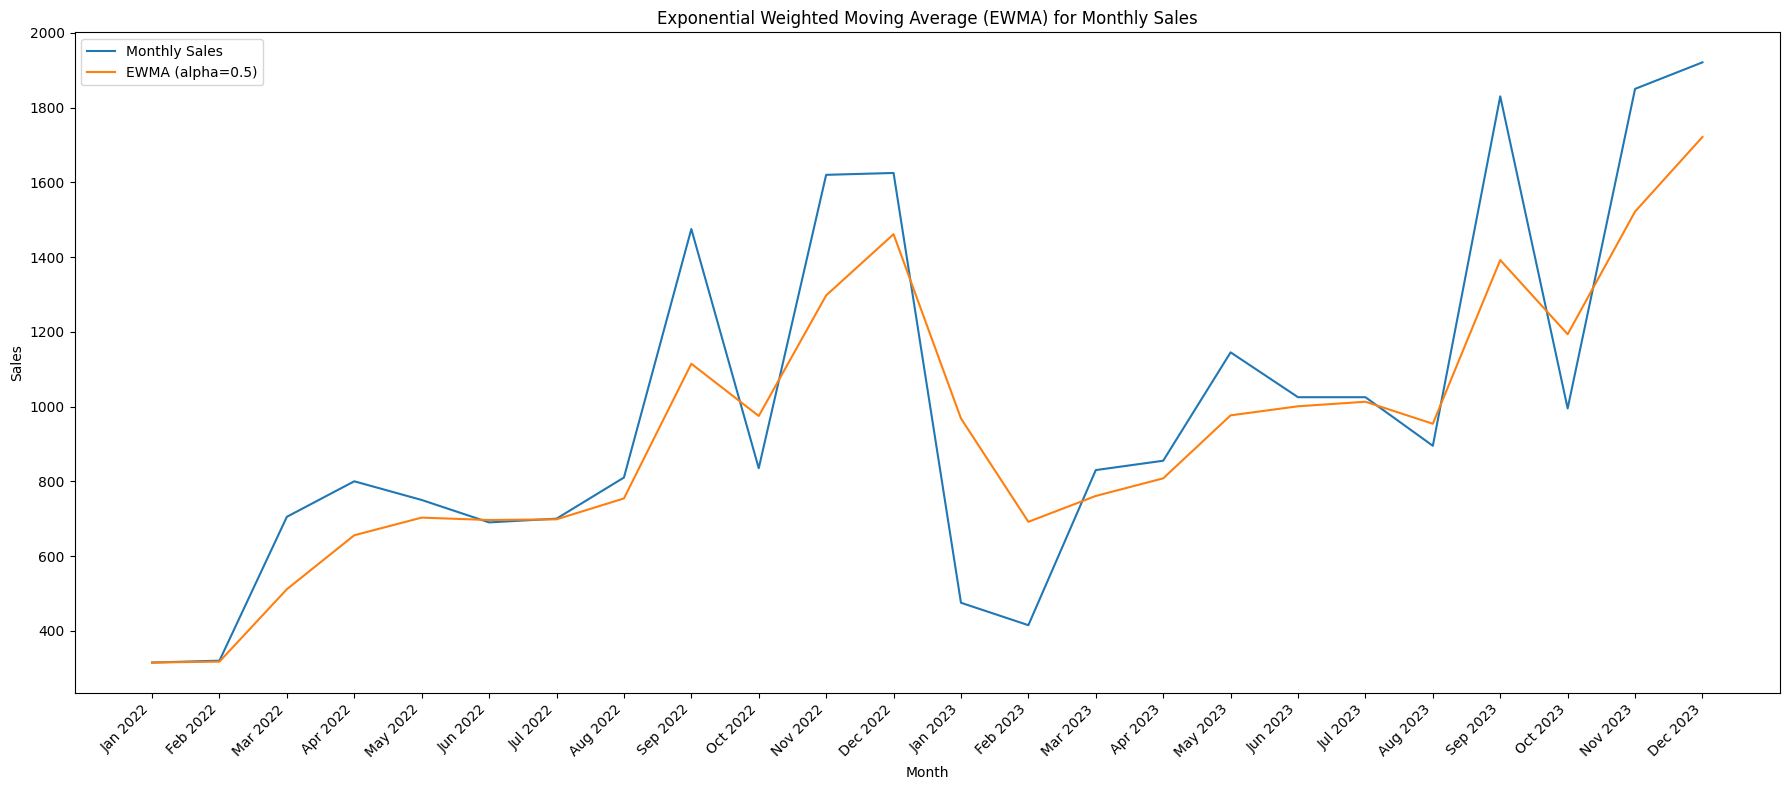

In [11]:
alpha = 0.5

df_monthly['ewma'] = df_monthly['sales'].ewm(alpha=alpha, adjust=False).mean()

month_year_labels = df_monthly.index.strftime('%b %Y')

plt.figure(figsize=(18, 8))
plt.plot(month_year_labels, df_monthly['sales'], label='Monthly Sales')
plt.plot(month_year_labels, df_monthly['ewma'], label=f'EWMA (alpha={alpha})')
plt.title('Exponential Weighted Moving Average (EWMA) for Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()

### **Dickey Fuller Test**
- To check weather my data is stationary or not.

In [12]:
from statsmodels.tsa.stattools import adfuller

sales_series = df_monthly['sales']
result = adfuller(sales_series)

test_statistic, p_value, _, _, _, _ = result

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

if p_value <= 0.05:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")


Test Statistic: -2.73630143067017
P-value: 0.06796441915351661
Fail to reject the null hypothesis: The time series is non-stationary.


Since our data is non-stationary we are going to use a method called `Differencing` to make our data stationary.

In [13]:
df_monthly2 = df_monthly.copy()
df_monthly2['sales_diff'] = df_monthly2['sales'] - df_monthly2['sales'].shift(1)

In [14]:
df_monthly2 = df_monthly2.dropna()
df_monthly2

,sales,ewma,sales_diff
date,,,
2022-02-28,320,317.500000,5.0
2022-03-31,705,511.250000,385.0
2022-04-30,800,655.625000,95.0
2022-05-31,750,702.812500,-50.0
2022-06-30,690,696.406250,-60.0
2022-07-31,700,698.203125,10.0
2022-08-31,810,754.101562,110.0
2022-09-30,1475,1114.550781,665.0
2022-10-31,835,974.775391,-640.0


Again doing dickey fuller test

In [15]:
sales_series = df_monthly2['sales_diff']
result = adfuller(sales_series)

test_statistic, p_value, _, _, _, _ = result

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

if p_value <= 0.05:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")

Test Statistic: -7.274533343958581
P-value: 1.5568760304758292e-10
Reject the null hypothesis: The time series is stationary.


<AxesSubplot: xlabel='date'>

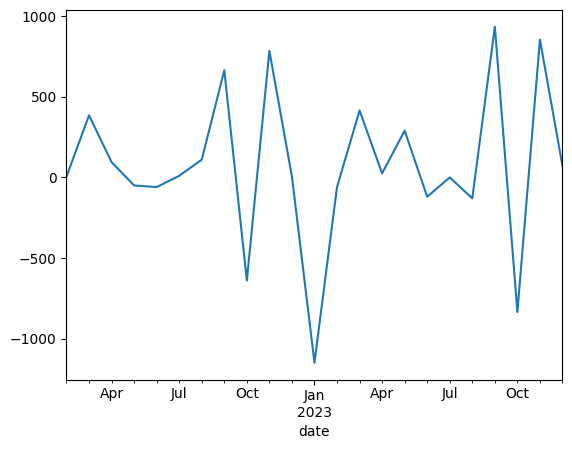

In [16]:
df_monthly2['sales_diff'].plot()

### **SARIMAX**
- Since our data have some seaonality so we will use `SARIMAX(Seaonal Autoregressive Integrated Moving Average eXogenous)` model.
- To use this model we have to determine `P,D,Q` values.
- We did differencing with only one shift to make our data stationary so our `D=1`.
- We will use `ACF(Autocorrelation Function)` and `PACF(Partial Autocorrelation Function)` plots to detemine `P` & `Q` values.

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Identification of MA model is best done with `ACF` plot.

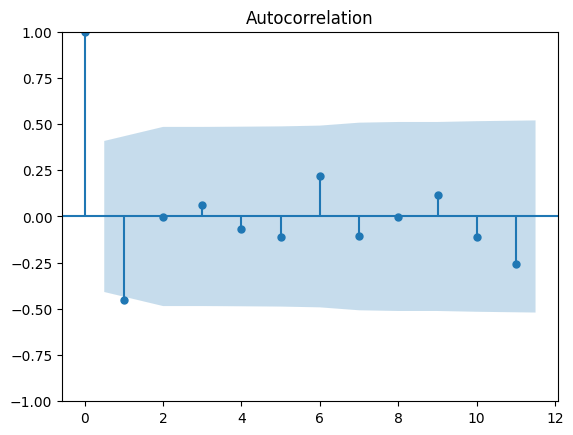

In [18]:
acf_plot = plot_acf(df_monthly2['sales_diff'])

Identification of AR model is best done with `PACF` plot.

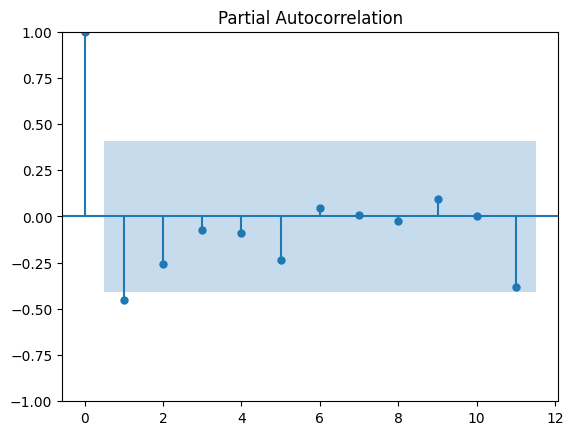

In [19]:
pacf_plot = plot_pacf(df_monthly2['sales_diff'])

##### **After evaluation both `ACF` and `PACF` plots we can conclude that:**
- `P=1`, from `PACF` plot.
- `Q=1`, from `ACF` plot.

In [20]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

#### Split data for training and testing.

In [21]:
train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly[0:train_size], df_monthly[train_size:]

#### Fit `SARIMAX` model for our determined `P,D,Q` values.

In [22]:
order = (1, 1, 1) 
model = sm.tsa.statespace.SARIMAX(train['sales'], order=order, seasonal_order=(1,1,1,6)) #considering seaonality also 
result = model.fit(disp=False)

#### Prediction & Evaluation.

In [23]:
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start=start, end=end, dynamic=True, typ='levels')

In [24]:
rmse = sqrt(mean_squared_error(test['sales'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 100.10268013294949


- RMSE of 100 can be considered as reasonable.

### **Forecasting & Ploting our predictions.**

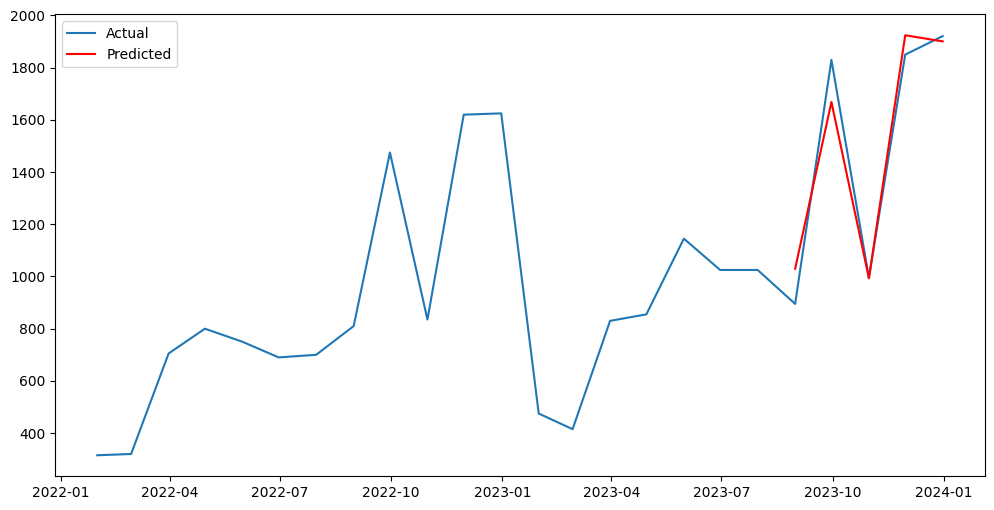

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df_monthly['sales'], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

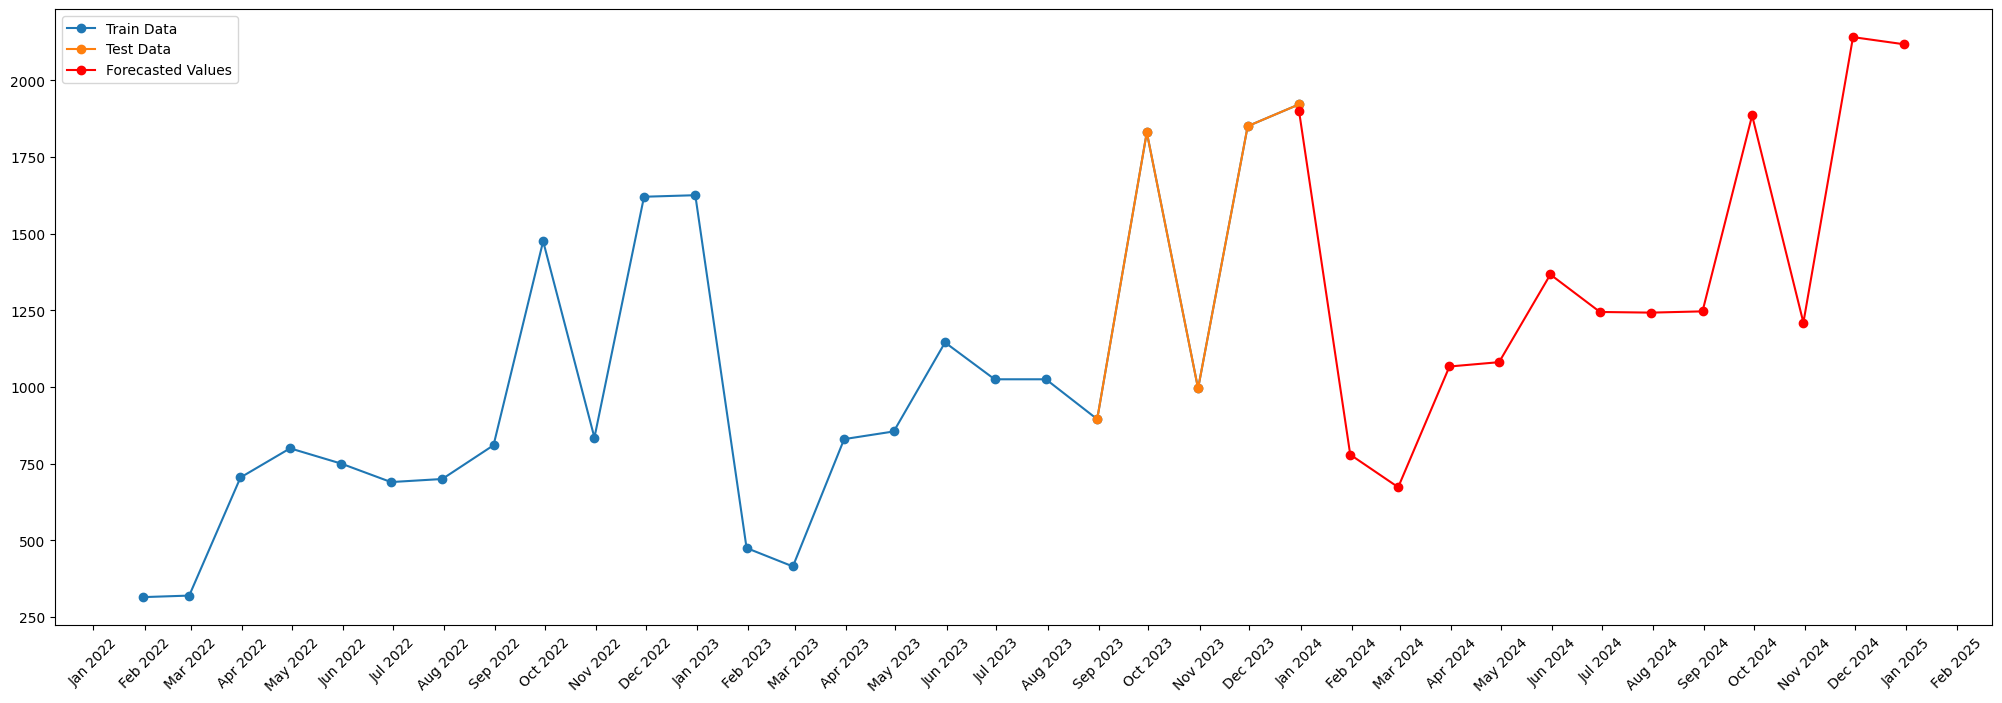

In [27]:
import matplotlib.dates as mdates

forecast_periods = 17
skip_first_n_periods = 4

forecast = result.get_forecast(steps=forecast_periods)

forecast_values = forecast.predicted_mean[skip_first_n_periods:]

plt.figure(figsize=(25,8))
plt.plot(df_monthly['sales'], label='Train Data', marker='o')
plt.plot(test['sales'], label='Test Data', marker='o')
plt.plot(forecast_values.index, forecast_values.values, color='red', marker='o', label='Forecasted Values')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.legend()
plt.show()

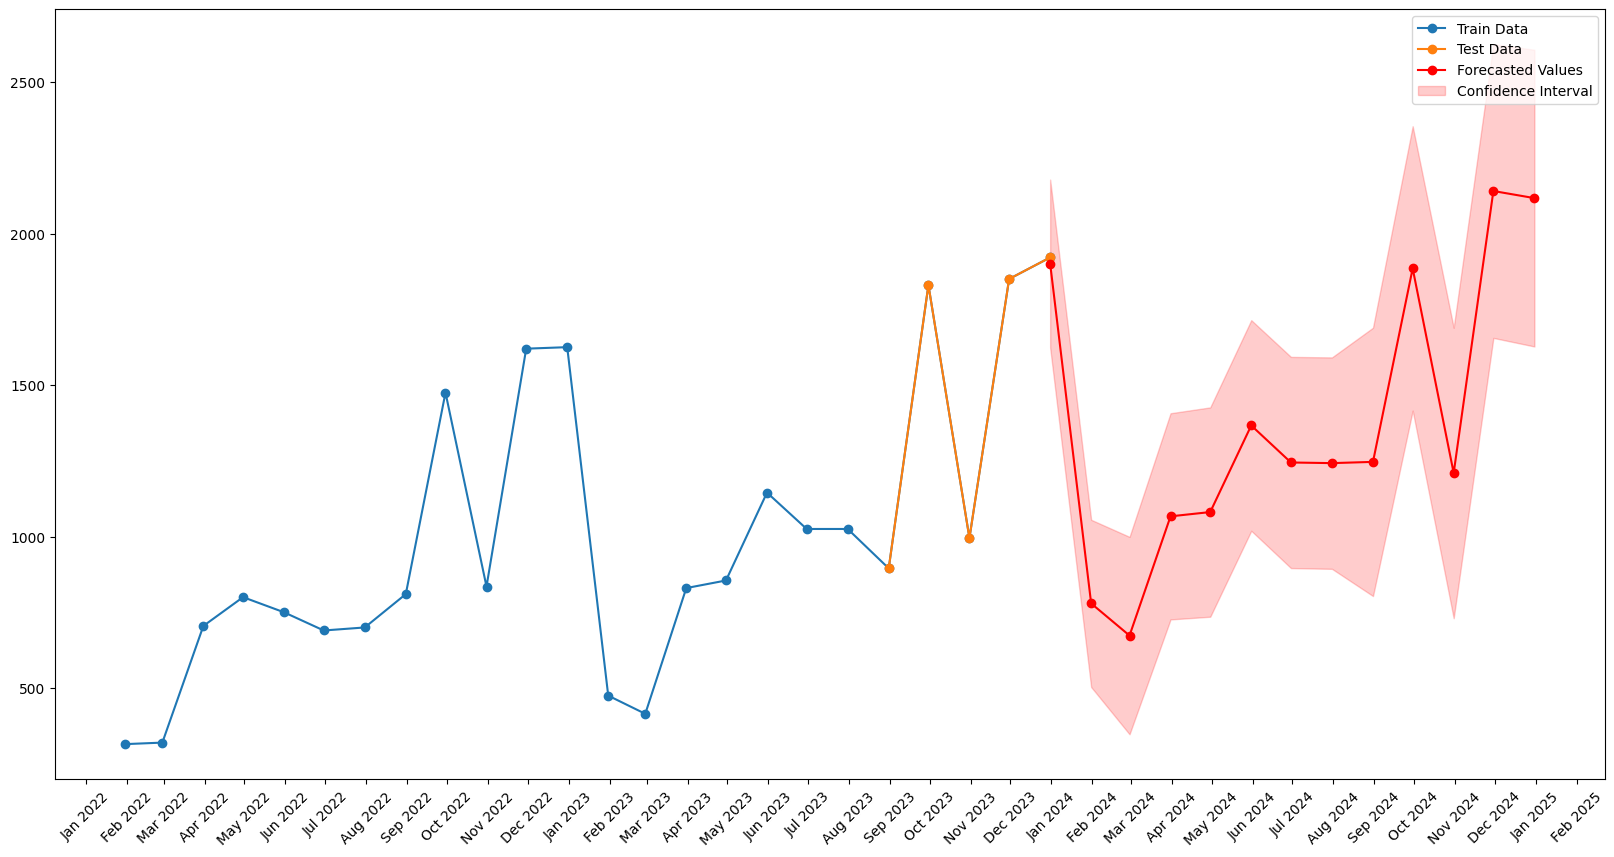

In [33]:
import matplotlib.dates as mdates

forecast_periods = 17
skip_first_n_periods = 4

forecast = result.get_forecast(steps=forecast_periods)
forecast_values = forecast.predicted_mean[skip_first_n_periods:]
confidence_interval = forecast.conf_int()

plt.figure(figsize=(20, 10))
plt.plot(df_monthly['sales'], label='Train Data', marker='o')
plt.plot(test['sales'], label='Test Data', marker='o')
plt.plot(forecast_values.index, forecast_values.values, color='red', marker='o', label='Forecasted Values')

plt.fill_between(confidence_interval.index[skip_first_n_periods:], 
                 confidence_interval.iloc[skip_first_n_periods:, 0], 
                 confidence_interval.iloc[skip_first_n_periods:, 1], 
                 color='red', alpha=0.2, label='Confidence Interval')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.legend()
plt.show()


In [ ]:
fig = px.line()

fig.add_scatter(x=df_monthly.index, y=df_monthly['sales'], mode='lines+markers', name='Train Data')

fig.add_scatter(x=test.index, y=test['sales'], mode='lines+markers', name='Test Data')

fig.add_scatter(x=forecast_values.index, y=forecast_values.values, mode='lines+markers', name='Forecasted Values', line=dict(color='red'))

fig.update_layout(xaxis=dict(
    tickformat='%b %Y',
    tickmode='linear',
    dtick='M1',
    tickangle=45
))
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


##### **Training model on Full dataset for deployment.**

In [ ]:
order = (1, 1, 1) 
model = sm.tsa.statespace.SARIMAX(df_monthly['sales'], order=order, seasonal_order=(1,1,1,6)) #considering seaonality also 
result = model.fit(disp=False)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
import pickle
with open('Model.pkl', 'wb') as file:
    pickle.dump(model, file)

## **Conclusion**: 

In this sales forecasting project, a predictive model was developed to estimate future sales values. The model's performance was evaluated using the Root Mean Squared Error (RMSE), a metric commonly used to assess the accuracy of predictions.

- **Model Evaluation**: The trained model demonstrated a Root Mean Squared Error (RMSE) of 100. Given the context of the problem and the scale of the data, this RMSE can be considered reasonable. It's important to note that the RMSE is an absolute measure of prediction error, and its acceptability depends on the specific requirements and expectations of the forecasting task.

- **Areas for Future Improvement**: While the model performs well, there are always opportunities for refinement and enhancement. Future iterations of the forecasting model could benefit from additional feature engineering, tuning hyperparameters, or exploring more advanced algorithms to potentially improve predictive accuracy.

Overall, the current model offers a solid foundation for sales forecasting, providing valuable insights for planning and decision-making.

